1. Exploration des données

In [30]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Chargement des données depuis le fichier CSV
data = pd.read_csv('ventes_technova.csv',sep=',')
data.head()

,id_commande,date_achat,nom_produit,quantite,mode_paiement,ville_client,delai_livraison_jours,prix_unitaire
0,10001,2025-04-12,Smartphone X,2,Carte Bleue,Paris,3,799.0
1,10002,2025-08-22,Casque Sans Fil,1,PayPal,Lyon,5,150.0
2,10003,2025-01-05,Souris Gaming,3,Carte Bleue,Lille,2,50.0
3,10004,2025-11-30,Ecran 27 pouces,1,Apple Pay,Marseille,7,300.0
4,10005,2025-06-15,Clavier Mécanique,1,Carte Bleue,Bordeaux,4,80.0


In [32]:
# Affichage des dimensions du dataset
data.shape

(503, 8)

In [33]:
# Verifications des informations sur les colonnes des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_commande            503 non-null    int64  
 1   date_achat             503 non-null    object 
 2   nom_produit            503 non-null    object 
 3   quantite               503 non-null    int64  
 4   mode_paiement          503 non-null    object 
 5   ville_client           503 non-null    object 
 6   delai_livraison_jours  503 non-null    int64  
 7   prix_unitaire          483 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 31.6+ KB


In [34]:
# modification du type de données des colonnes pour correspondre aux types réels

# modification de la colonne date_achat en colonne de type datetime
data['date_achat'] = pd.to_datetime(data['date_achat'])

# modification de la colonne mode de paiement en type catégorielle
data['mode_paiement'] = data['mode_paiement'].astype('category')

# affichage des nouveaux types des colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_commande            503 non-null    int64         
 1   date_achat             503 non-null    datetime64[ns]
 2   nom_produit            503 non-null    object        
 3   quantite               503 non-null    int64         
 4   mode_paiement          503 non-null    category      
 5   ville_client           503 non-null    object        
 6   delai_livraison_jours  503 non-null    int64         
 7   prix_unitaire          483 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 28.3+ KB


In [35]:
# vérification du nombre de not a number
data.isna().sum()

id_commande               0
date_achat                0
nom_produit               0
quantite                  0
mode_paiement             0
ville_client              0
delai_livraison_jours     0
prix_unitaire            20
dtype: int64

In [36]:
# suppression des lignes avec des not a number
data.dropna(subset=['prix_unitaire'],inplace=True)
data.isna().sum()

id_commande              0
date_achat               0
nom_produit              0
quantite                 0
mode_paiement            0
ville_client             0
delai_livraison_jours    0
prix_unitaire            0
dtype: int64

In [37]:
# verification des lignes dupliquées
data.duplicated().sum()

np.int64(5)

In [38]:
# suppression des lignes dupliquées
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [39]:
# affichage de la sortie de describe
data.describe()

,id_commande,date_achat,quantite,delai_livraison_jours,prix_unitaire
count,478.000000,478,478.000000,478.000000,478.000000
mean,10293.458159,2025-06-30 12:57:14.309623552,1.788703,4.433054,246.868201
min,10001.000000,2025-01-05 00:00:00,1.000000,1.000000,50.000000
25%,10128.250000,2025-03-20 00:00:00,1.000000,3.000000,80.000000
50%,10251.500000,2025-07-05 00:00:00,1.000000,4.000000,150.000000
75%,10378.750000,2025-10-05 00:00:00,2.000000,6.000000,300.000000
max,10700.000000,2025-12-28 00:00:00,4.000000,8.000000,799.000000
std,208.981039,NaN,0.968756,1.647918,255.012182


In [40]:
# Calcul du chiffre d'affaire CA

# calcul du prix de vente
data['prix_vente'] = data['quantite']*data['prix_unitaire']

# calcul de CA
CA = data['prix_vente'].sum()
CA

np.float64(186844.0)

In [41]:
# groupement des articles par quantité vendue
article_groupes = data.groupby("nom_produit")['prix_vente'].sum()
article_groupes = article_groupes.reset_index()
article_groupes.columns=['nom_produit','quantite_vendue']
article_groupes.sort_values(['quantite_vendue'],ascending=False)
article_groupes

,nom_produit,quantite_vendue
0,Casque Sans Fil,20250.0
1,Clavier Mécanique,12640.0
2,Ecran 27 pouces,42900.0
3,Enceinte Bluetooth,18360.0
4,Smartphone X,84694.0
5,Souris Gaming,8000.0


In [42]:
# affichage des trois articles les plus vendus
display("Les trois articles les plus vendus sont :")
articles_star = article_groupes[0:3]['nom_produit']
for  i in range(3) :
    print(f"{i+1} - {articles_star[i]}")

'Les trois articles les plus vendus sont :'

1 - Casque Sans Fil
2 - Clavier Mécanique
3 - Ecran 27 pouces


<Axes: title={'center': 'Boxplot du délai de livraison par ville'}, xlabel='delai_livraison_jours', ylabel='ville_client'>

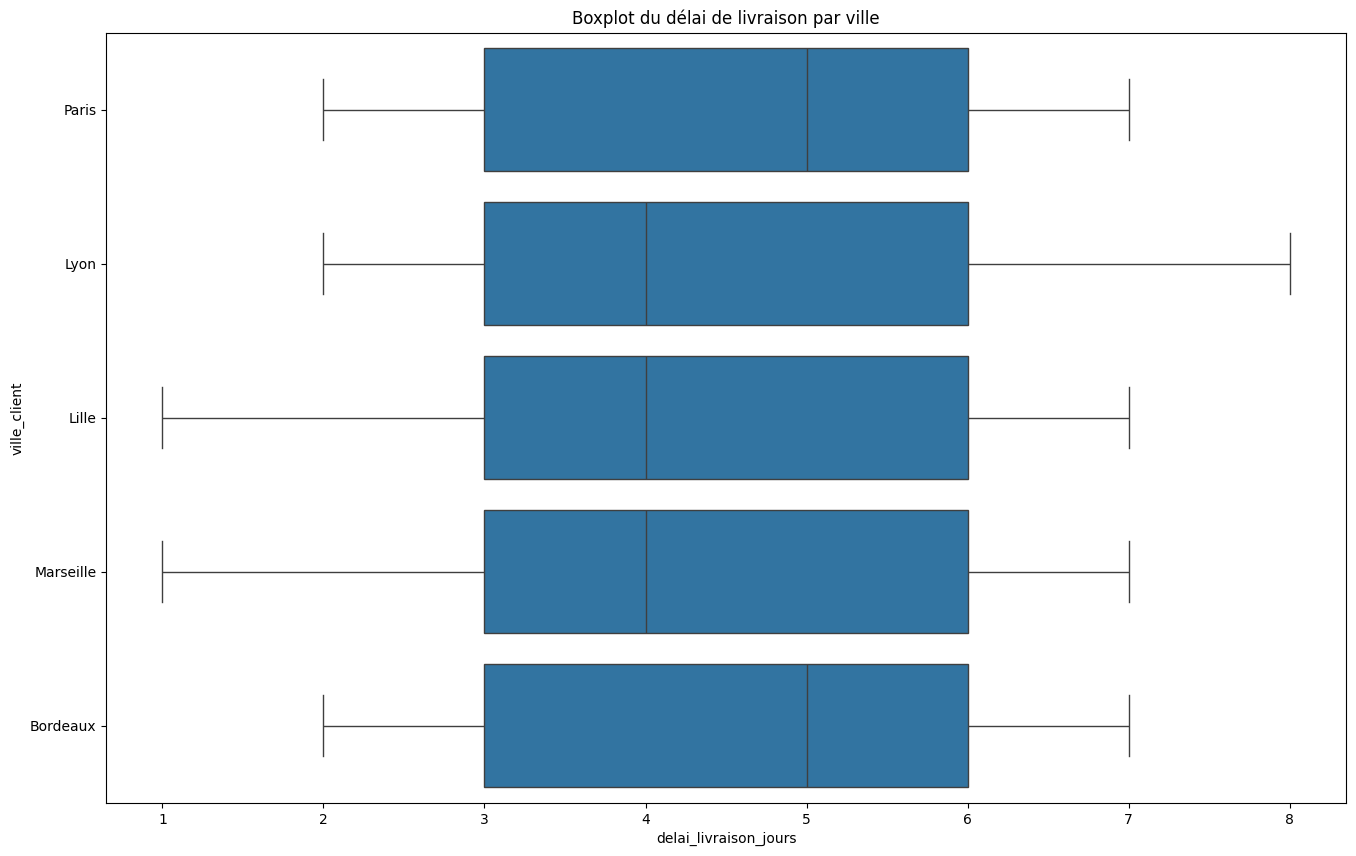

In [46]:
# Boxplot du délai de livraison par ville
plt.figure(figsize=(16,10))
plt.title("Boxplot du délai de livraison par ville")
sns.boxplot(data=data, x="delai_livraison_jours",y='ville_client')


In [ ]:
# Creation d'une colonne mois achat
data["mois_achat"] = data["date_achat"].dt.month

In [ ]:
# regroupement des chiffres d'affaires par mois
data_par_mois = data.groupby('mois_achat')['prix_vente'].sum()
data_par_mois=data_par_mois.reset_index()
data_par_mois.columns=['mois_achat','mois_CA']

,mois_achat,mois_CA
0,1,17639.0
1,2,19718.0
2,3,22025.0
3,4,21583.0
4,5,10605.0


<Axes: title={'center': "Evolution du chiffre d'affaire par mois"}, xlabel='mois_achat', ylabel='mois_CA'>

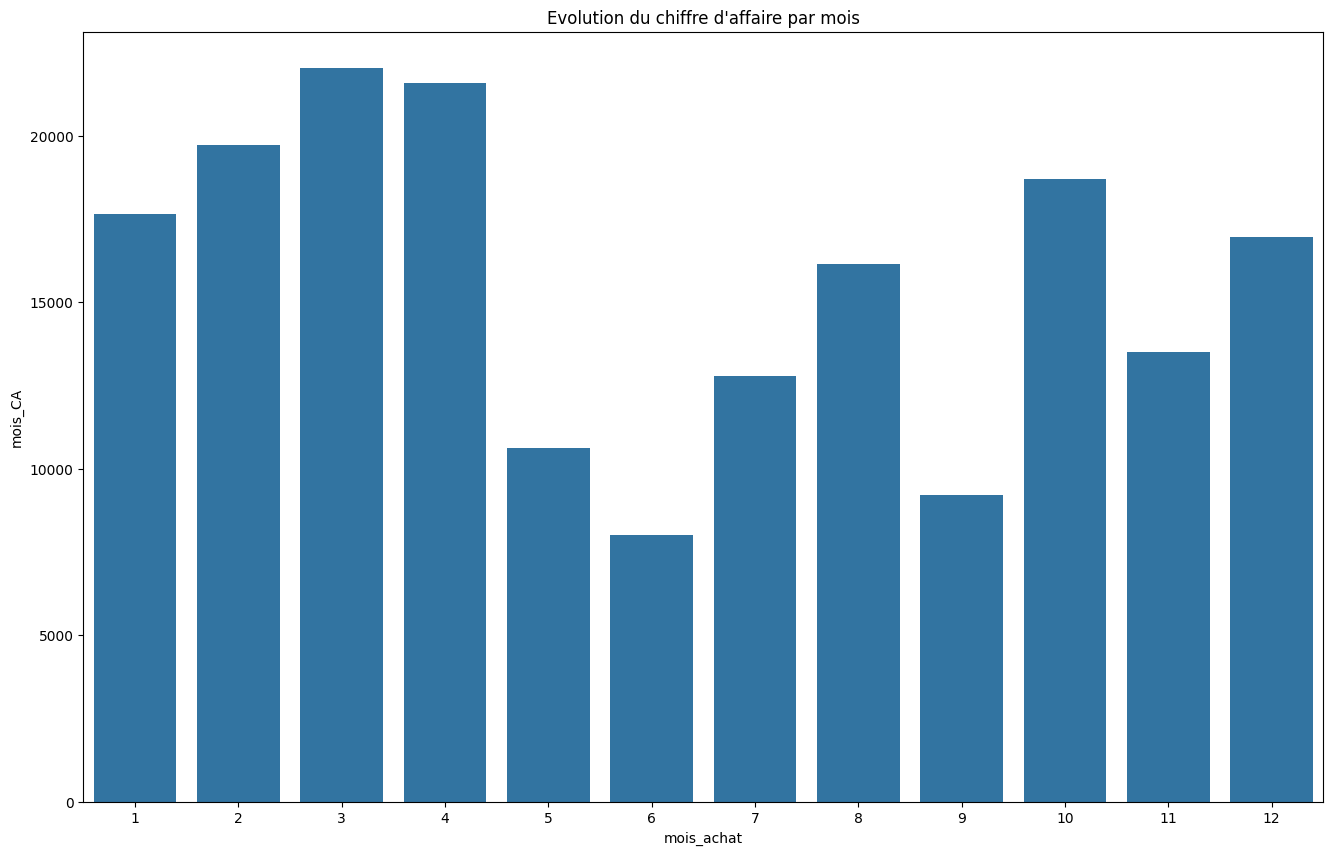

In [55]:
plt.figure(figsize=(16,10))
plt.title("Evolution du chiffre d'affaire par mois")
sns.barplot(data=data_par_mois, x="mois_achat", y="mois_CA")